In [13]:
import pandas as pd
import sys  
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from timestamp import aukioloajat
# tai from ... import *
import matplotlib.pyplot as plt

# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

In [2]:
df = pd.read_csv('projekti2.csv').head(10000)
df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
9995,9995,b'-2393099149039893833',b'2020-06-29 10:19:16.417545+00:00',1301,-120,100,0
9996,9996,b'-2393099149039893833',b'2020-06-29 10:19:25.417615+00:00',1301,-119,100,0
9997,9997,b'-2393099149039893833',b'2020-06-29 10:19:35.417986+00:00',1305,-112,100,0
9998,9998,b'-2393099149039893833',b'2020-06-29 10:19:45.417841+00:00',1305,-112,100,0


Number of missing variables in table
 Unnamed: 0    0
node_id       0
timestamp     0
x             0
y             0
z             0
q             0
dtype: int64
------------------------------
Unique values in columns

uniques in x 2549
uniques in y 2778
uniques in z 1
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100]
uniques in q [0]
------------------------------
Number of nodes: 1
------------------------------
Outliers

Data with outliers:  10000
Ouliers removed:     152
Data after:  9848


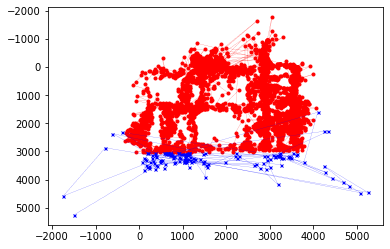

In [3]:
df = find_outliers(df)

In [4]:
df =  clean_dataframe(df)

In [5]:
df


,index,Unnamed: 0,node_id,timestamp,x,y
0,0,0,1,2020-06-24 15:20:08.533,2762,-257
1,1,1,1,2020-06-24 15:20:08.620,2870,-344
2,2,2,1,2020-06-24 15:20:09.623,2916,-344
3,3,3,1,2020-06-24 15:20:09.623,2894,-254
4,4,4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...,...,...
9623,9995,9995,1,2020-06-29 13:19:16.418,1301,-120
9624,9996,9996,1,2020-06-29 13:19:25.418,1301,-119
9625,9997,9997,1,2020-06-29 13:19:35.418,1305,-112
9626,9998,9998,1,2020-06-29 13:19:45.418,1305,-112


In [6]:
df = df.reset_index()
df

,level_0,index,Unnamed: 0,node_id,timestamp,x,y
0,0,0,0,1,2020-06-24 15:20:08.533,2762,-257
1,1,1,1,1,2020-06-24 15:20:08.620,2870,-344
2,2,2,2,1,2020-06-24 15:20:09.623,2916,-344
3,3,3,3,1,2020-06-24 15:20:09.623,2894,-254
4,4,4,4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...,...,...,...
9623,9623,9995,9995,1,2020-06-29 13:19:16.418,1301,-120
9624,9624,9996,9996,1,2020-06-29 13:19:25.418,1301,-119
9625,9625,9997,9997,1,2020-06-29 13:19:35.418,1305,-112
9626,9626,9998,9998,1,2020-06-29 13:19:45.418,1305,-112


In [7]:
df['seconds'] = df.timestamp.dt.second
df['difference'] = df.seconds.diff()

df

,level_0,index,Unnamed: 0,node_id,timestamp,x,y,seconds,difference
0,0,0,0,1,2020-06-24 15:20:08.533,2762,-257,8,NaN
1,1,1,1,1,2020-06-24 15:20:08.620,2870,-344,8,0.0
2,2,2,2,1,2020-06-24 15:20:09.623,2916,-344,9,1.0
3,3,3,3,1,2020-06-24 15:20:09.623,2894,-254,9,0.0
4,4,4,4,1,2020-06-24 15:20:10.116,2888,-188,10,1.0
...,...,...,...,...,...,...,...,...,...
9623,9623,9995,9995,1,2020-06-29 13:19:16.418,1301,-120,16,10.0
9624,9624,9996,9996,1,2020-06-29 13:19:25.418,1301,-119,25,9.0
9625,9625,9997,9997,1,2020-06-29 13:19:35.418,1305,-112,35,10.0
9626,9626,9998,9998,1,2020-06-29 13:19:45.418,1305,-112,45,10.0


In [8]:
df = df.sort_values(by='timestamp', ascending=True)
df

,level_0,index,Unnamed: 0,node_id,timestamp,x,y,seconds,difference
0,0,0,0,1,2020-06-24 15:20:08.533,2762,-257,8,NaN
1,1,1,1,1,2020-06-24 15:20:08.620,2870,-344,8,0.0
2,2,2,2,1,2020-06-24 15:20:09.623,2916,-344,9,1.0
3,3,3,3,1,2020-06-24 15:20:09.623,2894,-254,9,0.0
4,4,4,4,1,2020-06-24 15:20:10.116,2888,-188,10,1.0
...,...,...,...,...,...,...,...,...,...
9623,9623,9995,9995,1,2020-06-29 13:19:16.418,1301,-120,16,10.0
9624,9624,9996,9996,1,2020-06-29 13:19:25.418,1301,-119,25,9.0
9625,9625,9997,9997,1,2020-06-29 13:19:35.418,1305,-112,35,10.0
9626,9626,9998,9998,1,2020-06-29 13:19:45.418,1305,-112,45,10.0


In [10]:
onesec = []
moresec = []
nolla = []
index = 0
for i in df.seconds:
    
    if index > 0:
        if  i - df.loc[index-1].seconds == 1:
            onesec.append(1)
        elif i- df.loc[index-1].seconds == 0:
            nolla.append(1)
        else:
            moresec.append(1)
    index += 1
    
print(len(onesec))
print(len(moresec))
print(len(nolla))

        

2339
6010
1278


In [11]:
print(len(onesec)+len(moresec)+len(nolla))

9627


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


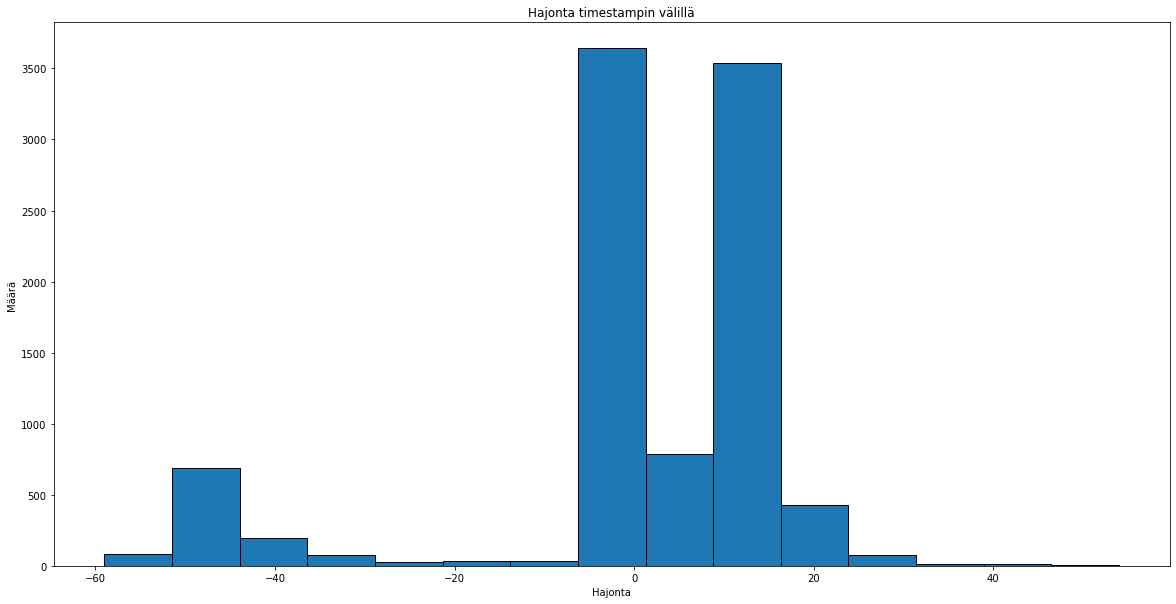

In [15]:
plt.figure(figsize=(20,10))
plt.hist(df['difference'], bins = 15, edgecolor='black')
plt.title('Hajonta timestampin välillä')
plt.xlabel('Hajonta')
plt.ylabel('Määrä')
plt.show()



In [42]:
difference = list(df['difference'])
bins = [0,1,5,10,20]
seconds_bins = pd.cut(difference, bins)

#lets count the values for each bin
pd.value_counts(seconds_bins)
#Note: A parenthesis mean the side is open
#square brakcet means it is closed and inclusive
#possible to change which side is closed by passing right=False

seconds_bins.categories

#It is possible to pass your own bin names
# by using a list of array for the labels
gnames = [ '0-1 seconds', '1-5 seconds','5-10 seconds','10-20 seconds']
bins_labels = pd.cut(difference, bins, labels=gnames)
bins_labels.categories
pd.value_counts(bins_labels)


5-10 seconds     3599
0-1 seconds      2341
1-5 seconds       652
10-20 seconds     485
dtype: int64

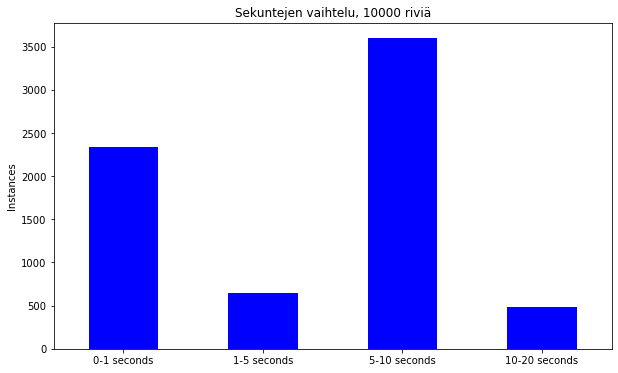

In [43]:
ax = bins_labels.value_counts().plot.bar(rot=0, color="b", figsize=(10,6))
ax.set_ylabel('Instances')
ax.set_title('Sekuntejen vaihtelu, 10000 riviä')
plt.show()

In [45]:
df.head(50)

,level_0,index,Unnamed: 0,node_id,timestamp,x,y,seconds,difference
0,0,0,0,1,2020-06-24 15:20:08.533,2762,-257,8,NaN
1,1,1,1,1,2020-06-24 15:20:08.620,2870,-344,8,0.0
2,2,2,2,1,2020-06-24 15:20:09.623,2916,-344,9,1.0
3,3,3,3,1,2020-06-24 15:20:09.623,2894,-254,9,0.0
4,4,4,4,1,2020-06-24 15:20:10.116,2888,-188,10,1.0
5,5,5,5,1,2020-06-24 15:20:11.086,2910,-200,11,1.0
6,6,6,6,1,2020-06-24 15:20:11.820,2924,-111,11,0.0
7,7,7,7,1,2020-06-24 15:20:12.995,2928,5,12,1.0
8,8,8,8,1,2020-06-24 15:20:13.596,2987,6,13,1.0
9,9,9,9,1,2020-06-24 15:20:14.482,3038,-8,14,1.0


In [46]:
df_xy = df[['x','y']]
df_xy

,x,y
0,2762,-257
1,2870,-344
2,2916,-344
3,2894,-254
4,2888,-188
...,...,...
9623,1301,-120
9624,1301,-119
9625,1305,-112
9626,1305,-112


In [55]:
df = xy_to_grid(df, df['x'], df['y'], 50)

In [53]:
df

,level_0,index,Unnamed: 0,node_id,timestamp,x,y,seconds,difference,x_grid,y_grid,xy_grid
0,209,211,211,1,2020-06-24 15:30:12.702,-83,522,12,3.0,0,4,1
1,211,213,213,1,2020-06-24 15:30:15.139,38,290,15,1.0,0,4,1
2,213,215,215,1,2020-06-24 15:30:16.417,59,185,16,1.0,0,4,1
3,90,92,92,1,2020-06-24 15:23:11.697,-42,1037,11,1.0,0,5,2
4,208,210,210,1,2020-06-24 15:30:09.955,-153,638,9,1.0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9623,3264,3364,3364,1,2020-06-25 17:16:27.645,3752,2826,27,1.0,9,9,80
9624,3263,3363,3363,1,2020-06-25 17:16:26.646,3791,2793,26,0.0,9,9,80
9625,3262,3362,3362,1,2020-06-25 17:16:26.646,3707,2808,26,0.0,9,9,80
9626,3259,3359,3359,1,2020-06-25 17:16:25.647,3647,2603,25,0.0,9,9,80


In [56]:
df_xy = df[['x_grid','y_grid']]
df_xy.head(5)

,x_grid,y_grid
0,0,41
1,0,41
2,0,41
3,0,42
4,0,43


[[38.32116788 42.91678832]
 [19.07705314 16.69589372]
 [14.80165289 46.74793388]
 [35.6036961  14.29979466]
 [14.23327306 31.92766727]
 [ 5.39275766 40.71587744]
 [34.26       30.39142857]
 [40.32156863 21.51960784]
 [24.15219842 16.4475761 ]
 [43.35227273 33.89204545]]


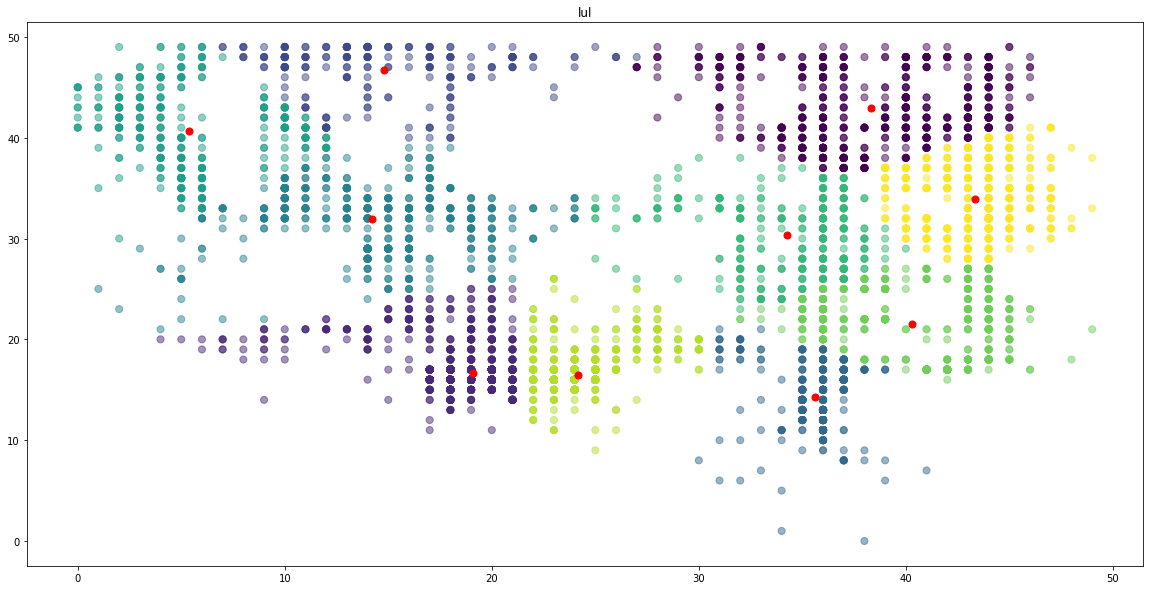

In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(df_xy)
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(20,10))
plt.scatter(df_xy['x_grid'], df_xy['y_grid'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('lul')
plt.show()

In [60]:
import datetime 
a = datetime.datetime(2020, 8, 16, 10, 27, 15) 
b = datetime.datetime(2020, 8, 16, 10, 10, 10) 
# returns a timedelta object 
c = a-b  
print('Difference: ', c) 
  
minutes = c.total_seconds() / 60
print('Total difference in minutes: ', minutes) 
  
# returns the difference of the time of the day 
minutes = c.seconds / 60
print('Difference in minutes: ', minutes) 

Difference:  0:17:05
Total difference in minutes:  17.083333333333332
Difference in minutes:  17.083333333333332
